Import các thư viện cần thiết

In [13]:
import os
import numpy as np
import sklearn
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Khai báo đường dẫn file dữ liệu

In [15]:
# set names to the paths because they're too long
data_path = 'D:/Code/python/mat3533/practice04/data/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

Xây dựng phương thức đọc dữ liệu từ tệp gzip, giải nén và đưa về định dạng là một dãy ảnh (một dãy ma trận
nguyên)

In [16]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

Lấy tập 5000 dữ liệu bất kì và kiể traduwx liệu

In [17]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


Giảm số chiều xuống còn 2 chiều và biểu diễn trên mặt phẳng dưới dạng chấm điểm

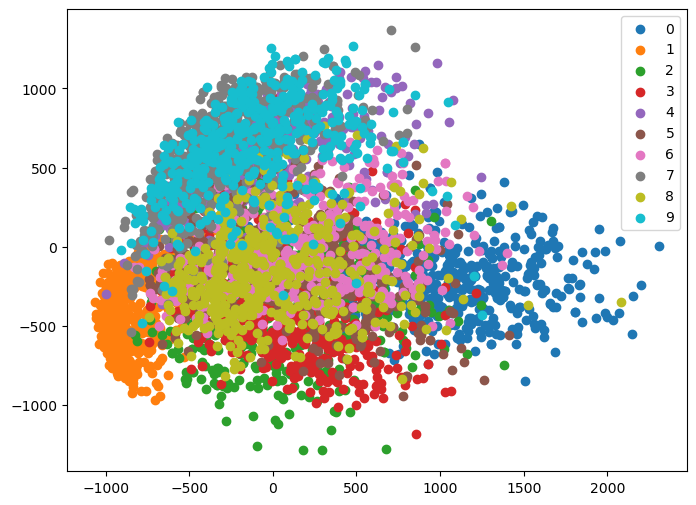

In [5]:
pca = PCA(n_components=2)
train_images_2d = pca.fit_transform(train_images)

# Plot data points with different classes
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(train_images_2d[train_labels == i, 0], train_images_2d[train_labels == i, 1], label=str(i))
plt.legend()
plt.show()

Phân loại dữ liệu vừa chuyển về 2 chiều theo tỷ lệ train:validation = 0.7:0.3

In [18]:
X_train, X_val, y_train, y_val = train_test_split(train_images_2d, train_labels, test_size=0.3, random_state=42)


Chạy mô hình Multinomial Logistic Regression và in kết quả

In [19]:
start_time = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Prediction: ", y_pred)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)

train_time = time.time() - start_time

print("Time: ", train_time)

Prediction:  [6 1 6 ... 1 1 1]
Accuracy:  0.10733333333333334
Time:  0.047009944915771484


Sử dụng dữ liệu nguyên bản, chia dữ liệu theo tỉ lệ train:validation = 0.7:0.3

In [20]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

In [21]:
start_time = time.time()

model_full = LogisticRegression(max_iter=10000)
model_full.fit(X_train_full, y_train_full)

y_pred_full = model_full.predict(X_test_full)
print("Prediction: ", y_pred_full)

accuracy_full = accuracy_score(y_test_full, y_pred_full)
print("Accracy: ", accuracy_full)

train_time_full = time.time() - start_time

print("Time: ", train_time_full)

Prediction:  [8 7 4 ... 3 3 6]
Accracy:  0.874
Time:  9.373008251190186


Chia tập 5000 ảnh theo tỷ lệ train:validation = 0.7:0.3, thực hiện giảm số chiều về 100

In [23]:
pca = PCA(n_components=100)
train_images_100d = pca.fit_transform(train_images)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(train_images_100d, train_labels, test_size=0.3, random_state=42)

In [24]:
start_time = time.time()

model_pca = LogisticRegression(max_iter=10000)
model_pca.fit(X_train_pca, y_train_pca)

y_pred = model_pca.predict(X_test_pca)
print("Prediction: ", y_pred)

accuracy = accuracy_score(y_test_pca, y_pred)
print("Accuracy: ", accuracy)

train_time = time.time() - start_time

print("Time: ", train_time)

Prediction:  [8 7 4 ... 5 3 6]
Accuracy:  0.8226666666666667
Time:  18.175811290740967


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
